In [1]:
import pandas as pd 
import numpy as np
from sklearn import (linear_model,
                     metrics,
                     preprocessing,
                     model_selection, 
                     ensemble,
                     neighbors,
                     covariance)
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data/data_ford_price.xlsx')
data = df.copy()
data1 = df.copy()
df.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7017 non-null   int64  
 1   year          7017 non-null   int64  
 2   condition     7017 non-null   int64  
 3   cylinders     7017 non-null   int64  
 4   odometer      7017 non-null   int64  
 5   title_status  7017 non-null   object 
 6   transmission  7017 non-null   object 
 7   drive         6626 non-null   object 
 8   size          5453 non-null   object 
 9   lat           7017 non-null   float64
 10  long          7017 non-null   float64
 11  weather       6837 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 658.0+ KB


In [4]:
df.describe(include='object')

,title_status,transmission,drive,size
count,7017,7017,6626,5453
unique,5,3,3,4
top,clean,automatic,4wd,full-size
freq,6657,6708,4888,4570


In [5]:
df.describe()

,price,year,condition,cylinders,odometer,lat,long,weather
count,7017.000000,7017.000000,7017.000000,7017.000000,7.017000e+03,7017.000000,7017.000000,6837.000000
mean,15121.549523,2007.869745,2.598689,7.374662,1.199787e+05,39.550144,-91.903404,52.142899
std,11765.423119,6.975329,0.703662,0.942928,8.992216e+04,5.745409,14.030710,7.954830
min,1.000000,1957.000000,0.000000,3.000000,0.000000e+00,-2.508807,-151.055832,29.000000
25%,5995.000000,2004.000000,2.000000,6.000000,7.328500e+04,35.661076,-95.937145,45.000000
50%,12750.000000,2010.000000,3.000000,8.000000,1.180000e+05,40.335245,-88.168416,51.000000
75%,21995.000000,2013.000000,3.000000,8.000000,1.578040e+05,43.582100,-82.706300,59.000000
max,299500.000000,2018.000000,5.000000,10.000000,2.490000e+06,77.617682,-5.377999,71.000000


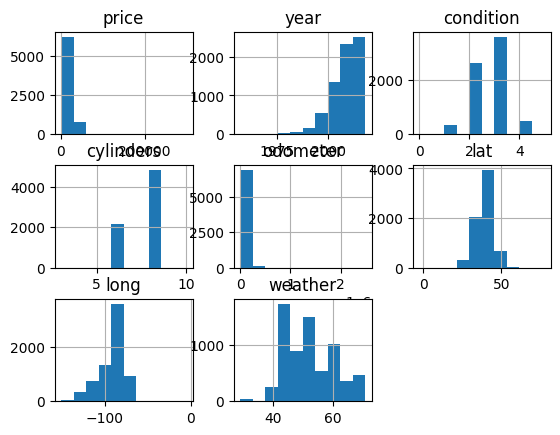

In [6]:
df.hist();

In [7]:
df['title_status'].value_counts(normalize=True, ascending=False)

title_status
clean      0.948696
rebuilt    0.021519
lien       0.020522
salvage    0.008408
missing    0.000855
Name: proportion, dtype: float64

In [8]:
df = df.dropna(ignore_index=True)

In [9]:
df.isnull().sum()

price           0
year            0
condition       0
cylinders       0
odometer        0
title_status    0
transmission    0
drive           0
size            0
lat             0
long            0
weather         0
dtype: int64

In [10]:
df.shape

(5202, 12)

In [11]:
X = df.drop('price', axis=1)
y = df['price']

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.2, random_state=30)

In [13]:
X_train

,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
3433,2001,1,8,143000,clean,automatic,4wd,full-size,43.117200,-88.344600,45.0
1073,2013,3,8,142245,clean,automatic,4wd,full-size,35.887189,-78.265568,56.0
4510,2016,3,6,9470,clean,automatic,4wd,mid-size,43.758910,-87.753580,45.0
905,2009,2,8,188000,clean,automatic,4wd,full-size,30.520244,-89.647288,61.0
1435,2009,3,8,110516,clean,automatic,4wd,mid-size,43.781240,-88.502650,45.0
...,...,...,...,...,...,...,...,...,...,...,...
4994,2014,2,8,109801,clean,automatic,4wd,full-size,35.018450,-85.204983,59.0
919,2001,3,8,140800,clean,automatic,fwd,full-size,39.340200,-84.399800,49.0
500,2010,2,8,190000,clean,automatic,rwd,full-size,37.113600,-93.289600,52.0
3885,2015,2,6,142282,clean,automatic,4wd,full-size,42.504823,-92.405569,47.0


In [14]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']

one_hot_encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')

X_train_onehot = one_hot_encoder.fit_transform(X_train[columns_to_change]).toarray()
X_test_onehot = one_hot_encoder.transform(X_test[columns_to_change]).toarray()

columns = one_hot_encoder.get_feature_names_out(columns_to_change)

X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns, index=X_train.index)
X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns, index=X_test.index)

X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1,)
X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)

X_train_new = X_train_new.drop(columns=columns_to_change)
X_test_new = X_test_new.drop(columns=columns_to_change)

In [15]:
lr = linear_model.LinearRegression()
lr.fit(X_train_new, y_train)
y_train_pred = lr.predict(X_train_new)
y_test_pred = lr.predict(X_test_new)
print('Train R2: {:.3f}'.format(metrics.r2_score(y_train, y_train_pred)))
print('Test R2: {:.3f}'.format(metrics.r2_score(y_test, y_test_pred)))

Train R2: 0.647
Test R2: 0.693


---

In [16]:
data.isnull().sum()

price              0
year               0
condition          0
cylinders          0
odometer           0
title_status       0
transmission       0
drive            391
size            1564
lat                0
long               0
weather          180
dtype: int64

In [17]:
test_data = data[data['weather'].isnull()]
test_data.shape

(180, 12)

In [18]:
data = data.dropna()

In [19]:
# Определим целевой признак и факторы
y_train = data['weather']
X_train = data.drop(['size','weather','drive'], axis=1)
X_test = test_data.drop(['size','weather','drive'], axis=1)

# Создадим кодировщик
one_hot_encoder = preprocessing.OneHotEncoder()
categorial_cols = ['cylinders', 'title_status', 'transmission']

# Закодируем категориальные признаки (обучаем кодировщик только на тренировочной выборке)
X_train_onehot = one_hot_encoder.fit_transform(X_train[categorial_cols]).toarray()
X_test_onehot = one_hot_encoder.transform(X_test[categorial_cols]).toarray()

# Результаты преобразуем обратно в DataFrame для удобства
columns = one_hot_encoder.get_feature_names_out(categorial_cols)
X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns, index=X_train.index)
X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns, index=X_test.index)

# Добавим результаты кодирования к исходным таблицам
X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)

# Удалим столбцы, которые уже были закодированы
X_train_new = X_train_new.drop(columns=categorial_cols)
X_test_new = X_test_new.drop(columns=categorial_cols)

# Создадим модель линейной регрессии и обучим ее на задачу предсказания пропусков
model = linear_model.LinearRegression()
model.fit(X_train_new, y_train)

# Сделаем предсказание целевой переменной (пропущенных значений в признаке weather) 
y_pred = model.predict(X_test_new)

In [20]:
y_pred.shape

(180,)

---

In [21]:
data = data[['price', 'year', 'cylinders', 'odometer' ,'lat', 'long', 'weather']]

data = data.dropna()

X = data.drop('price', axis=1)
y = data['price']

In [22]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.2, random_state=40)

In [23]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(round(metrics.mean_absolute_error(y_test, y_pred), 3))

4554.531


In [24]:
iso = ensemble.IsolationForest(contamination=.1)

y_prediction = iso.fit_predict(X_train)

mask = y_prediction != -1

X_train, y_train = X_train[mask], y_train[mask]

print(X_train.shape, y_train.shape)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(round(metrics.mean_absolute_error(y_test, y_pred), 3))

(3745, 6) (3745,)
4192.421


In [25]:
lof = neighbors.LocalOutlierFactor()

y_prediction = lof.fit_predict(X_train)

mask = y_prediction != -1

X_train, y_train = X_train[mask], y_train[mask]

print(X_train.shape, y_train.shape)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(round(metrics.mean_absolute_error(y_test, y_pred), 3))

(3538, 6) (3538,)
4196.038


In [26]:
ee = covariance.EllipticEnvelope(contamination=.01)

y_prediction = ee.fit_predict(X_train)

mask = y_prediction != -1

X_train, y_train = X_train[mask], y_train[mask]

print(X_train.shape, y_train.shape)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(round(metrics.mean_absolute_error(y_test, y_pred), 3))

(3502, 6) (3502,)
4196.172


In [27]:
df = data1[['price', 'year', 'weather']]
df.dropna(inplace=True, ignore_index=True)
df

C:\Users\arkad\AppData\Local\Temp\ipykernel_14480\2632218293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True, ignore_index=True)


,price,year,weather
0,43900,2016,59.0
1,15490,2009,52.0
2,2495,2002,45.0
3,1300,2000,49.0
4,6995,2003,50.0
...,...,...,...
6832,22500,2015,59.0
6833,5975,2005,50.0
6834,9999,2006,59.0
6835,10900,2011,47.0


In [28]:
X = df.drop('price', axis=1)
y = df['price']

In [29]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.3, random_state=40)

In [30]:
scaler = preprocessing.StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [31]:
model = linear_model.LinearRegression()
model.fit(X_train_scaler, y_train)
y_pred = model.predict(X_test_scaler)
print(round(metrics.mean_absolute_error(y_test, y_pred), 3))

5284.1


(array([2.000e+00, 1.000e+00, 0.000e+00, 4.200e+01, 6.100e+01, 1.600e+02,
        5.520e+02, 1.337e+03, 2.294e+03, 2.388e+03]),
 array([1957. , 1963.1, 1969.2, 1975.3, 1981.4, 1987.5, 1993.6, 1999.7,
        2005.8, 2011.9, 2018. ]),
 <BarContainer object of 10 artists>)

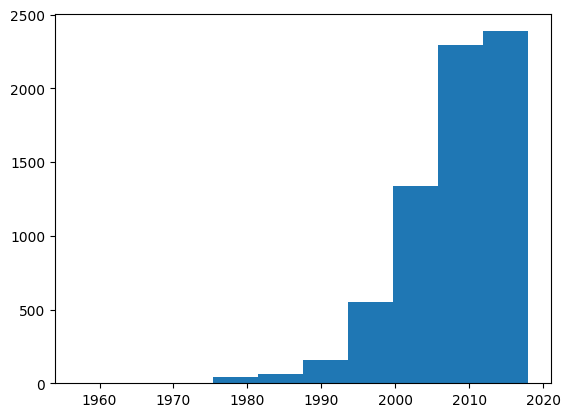

In [32]:
plt.hist(df.year)

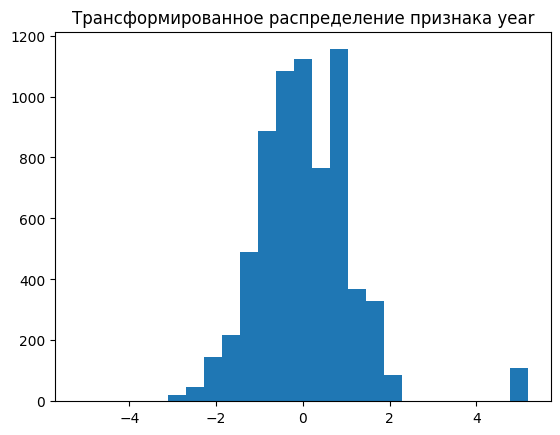

In [34]:
data_for_transform = df['year'].values.reshape((len(df),1))
 
quantile = preprocessing.QuantileTransformer(output_distribution='normal')
data_transformed = quantile.fit_transform(data_for_transform)
 
plt.hist(data_transformed, bins=25)
plt.title('Трансформированное распределение признака year')
plt.show()

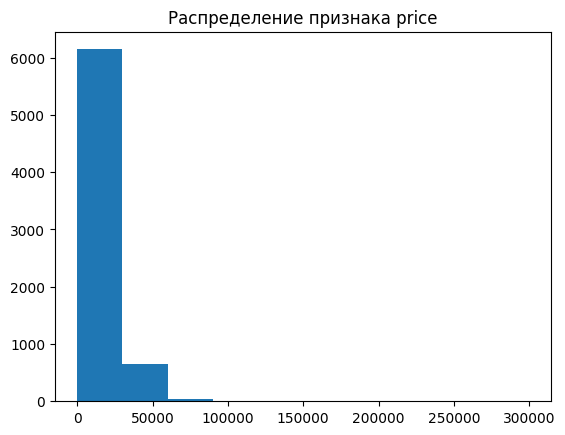

In [37]:
plt.hist(df.price)
plt.title('Распределение признака price');

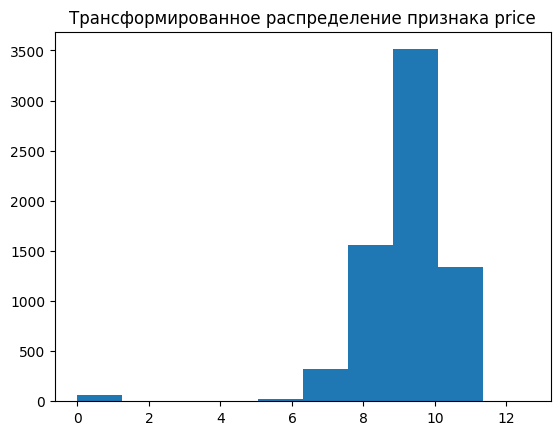

In [38]:
log_price = np.log(df['price'])
 
plt.hist(log_price)
plt.title('Трансформированное распределение признака price')
plt.show()

In [39]:
price_data = pd.concat([df['price'], log_price.rename('transformed_price')], axis = 1)
 
price_data.describe()

,price,transformed_price
count,6837.000000,6837.000000
mean,14721.720199,9.181346
std,11404.265303,1.276723
min,1.000000,0.000000
25%,5950.000000,8.691146
50%,12488.000000,9.432523
75%,21795.000000,9.989436
max,299500.000000,12.609870


In [40]:
box_cox = preprocessing.PowerTransformer(method = 'box-cox')
 
data_box_cox = box_cox.fit_transform(df[['price', 'year']].values)
data_box_cox = pd.DataFrame(data_box_cox, columns = ['transformed_price', 'transformed_year'])

c:\Users\arkad\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_morestats.py:1120: UserWarning: The optimal lambda is 124.08906369577412, but the returned lambda is the constrained optimum to ensure that the maximum or the minimum of the transformed data does not overflow in float64.
  lmax = boxcox_normmax(x, method='mle', optimizer=optimizer)
c:\Users\arkad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1159: RuntimeWarning: overflow encountered in square
  temp **= 2
c:\Users\arkad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1165: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\arkad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1165: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\arkad\AppData\Local\P

In [43]:
from sklearn.feature_selection import RFE
 
estimator = linear_model.LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

c:\Users\arkad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=3 > n_features=2. There will be no feature selection and all features will be kept.
  warnings.warn(


array(['year', 'weather'], dtype=object)